In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
data=pd.read_excel(r"C:\Users\anjup\Downloads\iris.xls")

In [266]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [267]:
data.shape

(150, 5)

In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Checking for missing values

In [269]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Checking the distribution of values

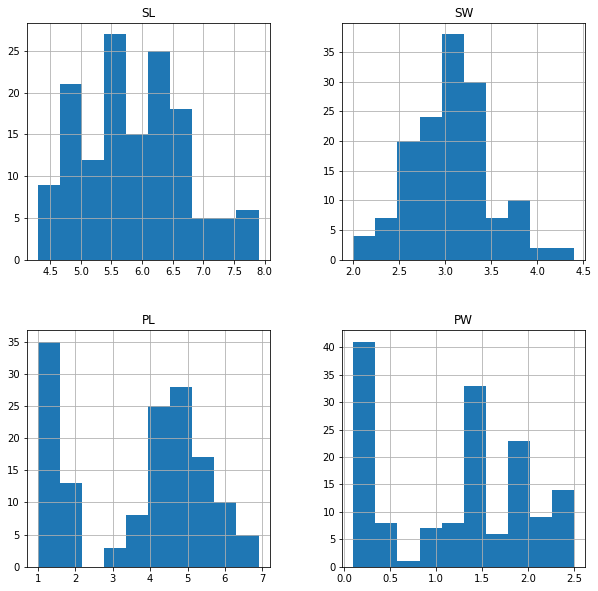

In [270]:
freq_graph= data.select_dtypes(include='float')
freq_graph.hist(figsize=(10,10))
plt.show()

# Filling the missing values 

In [271]:
data['SW']= data['SW'].fillna(data['SW'].median())
for i in ['SL','PL']:
    data[i]=data[i].fillna(data[i].mean())

In [272]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Checking for outliers

Text(0.5, 1.0, 'Boxplot for SL')

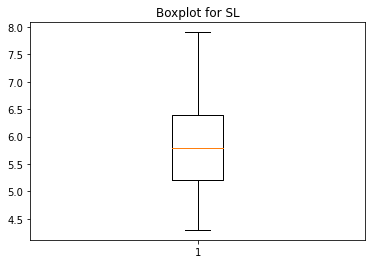

In [273]:
plt.boxplot(data['SL'])
plt.title('Boxplot for SL')

Text(0.5, 1.0, 'Boxplot for SW')

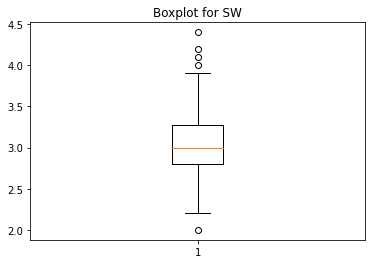

In [274]:
plt.boxplot(data['SW'])
plt.title('Boxplot for SW')

Text(0.5, 1.0, 'Boxplot for PL')

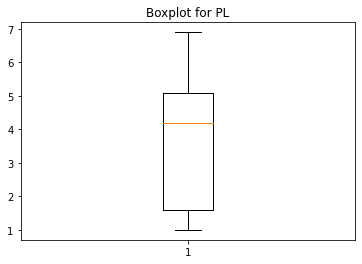

In [275]:
plt.boxplot(data['PL'])
plt.title('Boxplot for PL')

Text(0.5, 1.0, 'Boxplot for PW')

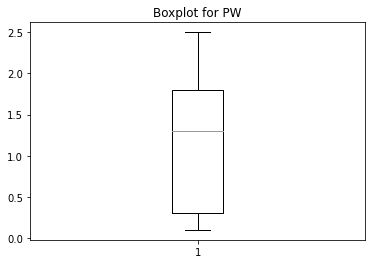

In [276]:
plt.boxplot(data['PW'])
plt.title('Boxplot for PW')

# Handling the outlier for SW

In [277]:
Q1=np.percentile(data['SW'],25)
Q2=np.percentile(data['SW'],50)
Q3=np.percentile(data['SW'],75)
IQR=Q3-Q1
Low_limit=Q1-1.5*IQR
Upp_limit=Q3+1.5*IQR

print("The first quartile :",Q1,"\nThe Second Quartile :",Q2,"\nThe third Quartile :", Q3,"\nIQR :",IQR,"\nUpper limit : ",Upp_limit,"\nLower Limit :",Low_limit)

outlier=[]
for i in data['SW']:
    if(i>Upp_limit) or (i<Low_limit):
        outlier.append(i)
        
print(f"The outliers are : {outlier}")


The first quartile : 2.8 
The Second Quartile : 3.0 
The third Quartile : 3.275 
IQR : 0.4750000000000001 
Upper limit :  3.9875 
Lower Limit : 2.0874999999999995
The outliers are : [4.0, 4.4, 4.1, 4.2, 2.0]


In [278]:
index_drop=data[(data['SW']>Upp_limit) | (data['SW']<Low_limit)].index
index_drop

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [279]:
data=data.drop(index_drop)
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [280]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']= le.fit_transform(data['Classification'])

In [281]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


# Logistic Regression

In [282]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']



In [283]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [284]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='ovr')
model= lr.fit(x_train,y_train)

In [285]:
y_prediction=model.predict(x_test)
print(y_prediction)

[1 2 0 0 0 2 2 2 1 0 0 1 2 2 1 0 2 2 2 1 1 2 0 1 0 0 1 1 2]


In [286]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [287]:
cm=confusion_matrix(y_test,y_prediction)
cm

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

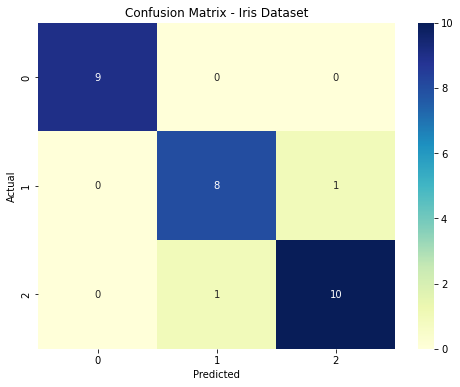

In [288]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Iris Dataset')
plt.show()

In [289]:
print("Accuracy=",accuracy_score(y_test,y_predictions))
print("Precision=",precision_score(y_test,y_predictions,average='weighted'))
print("Recall =",recall_score(y_test,y_predictions,average='weighted'))
print("F1 score=",f1_score(y_test,y_predictions,average='weighted'))

Accuracy= 0.9310344827586207
Precision= 0.9310344827586207
Recall = 0.9310344827586207
F1 score= 0.9310344827586207


# K-NN

In [290]:
from sklearn.neighbors import KNeighborsClassifier

In [291]:
metric_k=[]
neighbors=np.arange(3,15)

In [292]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [293]:
metric_k

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

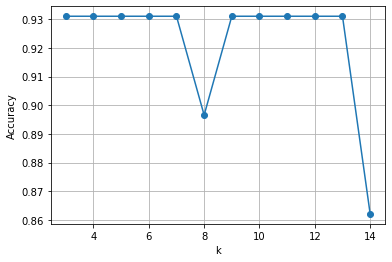

In [294]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [295]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [296]:
print("Accuracy=",accuracy_score(y_test,y_predictions))
print("Precision=",precision_score(y_test,y_predictions,average='weighted'))
print("Recall =",recall_score(y_test,y_predictions,average='weighted'))
print("F1 score=",f1_score(y_test,y_predictions,average='weighted'))

Accuracy= 0.9310344827586207
Precision= 0.9310344827586207
Recall = 0.9310344827586207
F1 score= 0.9310344827586207


# SVM Model

In [297]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [298]:
y_pred=svmclf.predict(x_test)

In [299]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy" ,accuracy_score(y_test,y_pred))
print("Precision=",precision_score(y_test,y_predictions,average='weighted'))
print("Recall =",recall_score(y_test,y_predictions,average='weighted'))
print("F1 score=",f1_score(y_test,y_predictions,average='weighted'))


Accuracy 0.896551724137931
Precision= 0.9310344827586207
Recall = 0.9310344827586207
F1 score= 0.9310344827586207


In [300]:
print(confusion_matrix(y_test,y_pred))

[[9 0 0]
 [0 8 1]
 [0 2 9]]


# Decision Trees

In [328]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [329]:
y_pred=dt_clf.predict(x_test)

In [327]:
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision=",precision_score(y_test,y_predictions,average='weighted'))
print("Recall =",recall_score(y_test,y_predictions,average='weighted'))
print("F1 score=",f1_score(y_test,y_predictions,average='weighted'))

Accuracy is : 0.896551724137931
Precision= 0.9310344827586207
Recall = 0.9310344827586207
F1 score= 0.9310344827586207


In [315]:
print(confusion_matrix(y_test,y_pred))

[[9 0 0]
 [0 8 1]
 [0 2 9]]


# Random Forest

In [316]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [317]:
y_pred=rf_clf.predict(x_test)


In [318]:
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision=",precision_score(y_test,y_predictions,average='weighted'))
print("Recall =",recall_score(y_test,y_predictions,average='weighted'))
print("F1 score=",f1_score(y_test,y_predictions,average='weighted'))

Accuracy is : 0.9310344827586207
Precision= 0.9310344827586207
Recall = 0.9310344827586207
F1 score= 0.9310344827586207


In [319]:
#Hyper Parameter Tuning
rf_clf=RandomForestClassifier(n_estimators=20,criterion='entropy',max_depth=20,min_samples_split=3)
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [320]:
y_pred=rf_clf1.predict(x_test)

In [324]:
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision=",precision_score(y_test,y_predictions,average='weighted'))
print("Recall =",recall_score(y_test,y_predictions,average='weighted'))
print("F1 score=",f1_score(y_test,y_predictions,average='weighted'))

Accuracy is : 0.9310344827586207
Precision= 0.9310344827586207
Recall = 0.9310344827586207
F1 score= 0.9310344827586207


# Conclusion

All the models are atmost similar with slight difference in the accuracy values.

Accuracy for decision trees and SVM model is 0.90 and other models have the accuracy rate of 0.93.

So , we can say that Logistic Regression, KNN and random forest are the best suitable  models with the accuracy of 93%.

Decision tree and SVM are also good models for this dataset , with the accuracy of 90%.